# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами.

Выполнил студент гр. 9382 Сорокумов Сергей, вариант 34.

# Цель работы
Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при 𝑡 → +∞.

# Основные теоретические положения

Линейная однородная система с периодическими коэффициентами - это система ОЛДУ следующего вида:
$$ X'=A(t)X, A(t+T)=A(t), t\geqslant0$$
Матрица $\Phi(t)=\{\phi_{ij}, i,j=1,2,...,n\}$ называется фундаментальной матрицей системы , если все её столбцы являются линейно независимыми решениями этой системы.
<br>
Матрица $C$ , удовлетворяющая условию $\Phi(t+T)=\Phi(t)C, \forall t \geqslant0$, называется основной для фундаментальной матрицы $\Phi(t)$.
<br>
Спектральным радиусом матрицы $A$ называется максимум модуля её собственных чисел: $\rho (A)=max |\lambda_i|, 0 \leqslant t \leqslant n$

# Постановка задачи
Дано дифференциальное уравнение:
$$x''+a(p,t)x=0, a(p,t)=p+b(t), b(t+T)=b(t),$$
где $p$ - параметр.
<br>
Данное уравнение сводится к системе двух уравнений I-го порядка:
\begin{equation}
    \begin{cases}
      u_1'=u_2,\\
      u_2'=-a(p,t)u_1;
    \end{cases}\,
\end{equation}
Здесь $u_1(t)=x(t), u_2(t)=x'(t).$
<br>
Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной периодической системе, а не только к системе вида.

# Выполнение работы

Используемые библиотеки:

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

 Задаем массив значений параметра $𝑝$, начальные вектора $V_1$ и $V_2$

In [2]:
p_range = np.arange(0, 20, 0.05)
t_range = (-1, 1)
V1 = (1, 0)
V2 = (0, 1)
r = []
p_0 = None

Вычисляем значение фундаментальной матрицы системы  при
$𝑡 = 𝑇$ с помощью любой программы численного решения задачи
Коши.
Вычисляем собственные числа матрицы $𝐶$ и ее спектральный радиус,

In [3]:
for p in p_range:
    mat = lambda  value, t : [value[1], -(p + 2*(np.cosh(2*t)))*value[0]]
    u1 = odeint(mat, V1, t_range)
    u2 = odeint(mat, V2, t_range)
    C = np.matrix([u1[-1], u2[-1]]).transpose()
    r.append(max(abs(np.linalg.eigvals(C))))

    
for i in range(len(r)):
    if r[-1-i] > 1:
        p_0 = p_range[-i]
        break
        
r = np.array(r)
p_0

18.75

Построение графика

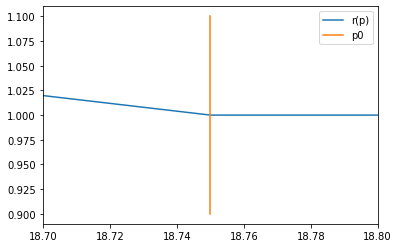

In [4]:
plt.plot(p_range, r, label="r(p)")
plt.plot([p_0, p_0], [0.9, 1.1], label="p0")
plt.xlim(18.7, 18.8)
plt.legend()
plt.show()

В ходе выполнения практической работы ОЛДУ с периодическими коэффициентами исследовано на устойчивость. Найдена граница между зонами устойчивости и неустойчивости равная $18.75$.